# Домашнее задание 2. CycleGAN

## Загрузка данных


>Решением домашки является архив с использованными тетрадками/модулями. Необходимо объяснять каждый пункт решения. В нем необходимо описать какие эксперименты вы производили для полученного результата, а так же обосновать почему вы решили использовать те или иные вариации и хаки для ганов - например, дополнительные лоссы для стабилизации и т.п.

In [1]:
!git clone https://github.com/Lornatang/CycleGAN-PyTorch #download-dataset
%cd CycleGAN-PyTorch

Cloning into 'CycleGAN-PyTorch'...
remote: Enumerating objects: 617, done.
remote: Counting objects: 100% (230/230), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 617 (delta 137), reused 210 (delta 126), pack-reused 387 (from 1)
Receiving objects: 100% (617/617), 1.48 MiB | 4.01 MiB/s, done.
Resolving deltas: 100% (337/337), done.
/content/CycleGAN-PyTorch


In [2]:
!pip install -r requirements.txt
!pip install munch

ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.15.2+cu118 (from versions: 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1)
ERROR: No matching distribution found for torchvision==0.15.2+cu118


In [3]:
import requests, zipfile
from io import BytesIO

download_link = "https://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip"


%cd /content/CycleGAN-PyTorch/data
r = requests.get(download_link, stream=True)
z = zipfile.ZipFile(BytesIO(r.content))
z.extractall()

%cd /content/CycleGAN-PyTorch

/content/CycleGAN-PyTorch/data
/content/CycleGAN-PyTorch


In [4]:
%cd /content/CycleGAN-PyTorch

/content/CycleGAN-PyTorch


In [5]:
import argparse
import itertools
import os
import random

import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.utils as vutils
from PIL import Image
from tqdm.auto import tqdm

%run dataset.py
%run imgproc.py
%run model.py
%run utils.py

from munch import Munch


In [6]:
args = Munch()
args.dataroot = "./data"
args.dataset="horse2zebra"
args.testA="testA"
args.testB="testB"
args.trainA="trainA"
args.trainB="trainB"
args.batch_size=1
args.cuda=True
args.image_size=256
args.manualSeed=1

if args.manualSeed is None:
    args.manualSeed = random.randint(1, 10000)
random.seed(args.manualSeed)
torch.manual_seed(args.manualSeed)

# Creating a Dataset and a Dataloader

In [7]:
cudnn.benchmark = True

if torch.cuda.is_available() and not args.cuda:
    print("WARNING: You have a CUDA device, so you should probably run with --cuda")

# Dataset
dataset = ImageDataset(src_images_dir=os.path.join(args.dataroot, args.dataset, args.trainA),
                       dst_images_dir=os.path.join(args.dataroot, args.dataset, args.trainB),
                       resized_image_size=int(args.image_size * 1.12),
                       unpaired=True,
                       )

dataloader = torch.utils.data.DataLoader(dataset, batch_size=args.batch_size, shuffle=True, pin_memory=True)

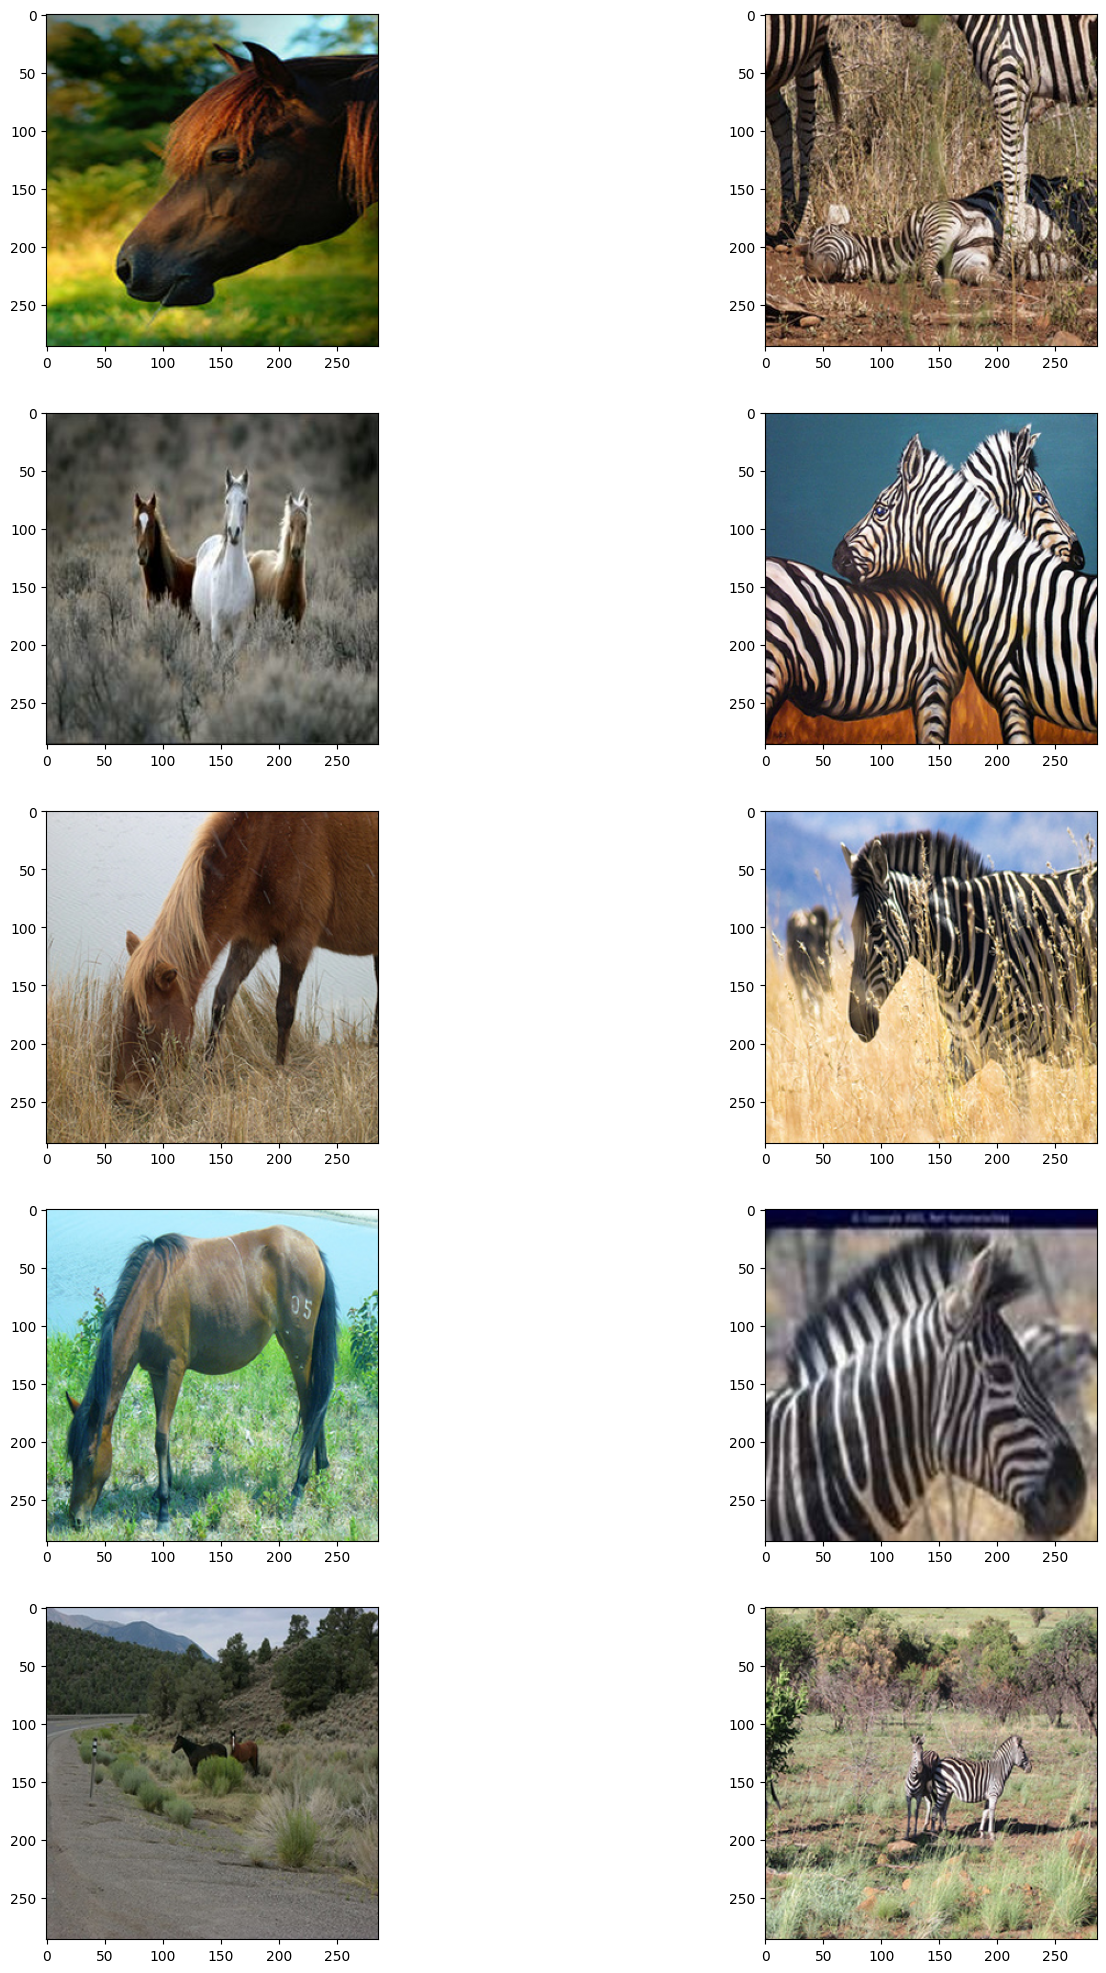

In [8]:
# %%capture --no-stdout
# , , --no-display and --output
import matplotlib.pyplot as plt
import numpy as np
IMGS_CNT = 5
plt.figure(figsize=(17,5*IMGS_CNT))
for i, idx in enumerate(np.random.choice(np.arange(len(dataset)), size=IMGS_CNT, replace=False)):
    data = dataset[idx]
    img1, img2 = [(1+data[x])/2 for x in ['src', 'dst']]
    plt.subplot(IMGS_CNT, 2, 2*i+1)
    plt.imshow(img1.permute(1,2,0).detach().cpu().numpy())
    plt.subplot(IMGS_CNT, 2, 2*i+2)
    plt.imshow(img2.permute(1,2,0).detach().cpu().numpy())

#Problems section

## Задача 1 (4/10). Построить ГАН.

>Здесь нужно обучить GAN до нормального качества, померить FID и запомнить для будущего сравнения.

> В принципе можно использовать тот код который уже есть в репозитории курса, но лучше написать свой.

> Ради интереса, ваш GAN тоже можно потестировать на маленьких датасетах

> **ГАН надо обучить генерить как зебр (`dst`), так и коней (`src`).**

## Задача 2 (6/10). Построить Cycle GAN.

> Используя ГАНы из Задачи 1, надо построить CycleGAN ([статья](https://arxiv.org/pdf/1703.10593)), обучить его до сравнимого с отдельными ГАНами качества, померить FID и запомнить для будущего сравнения.

## Задача 3 (1/10). Анализ.

> Проанализируйте результаты полученные моделями.

> Покажите хорошие и плохие примеры моделей. Чем можно объяснить подобное поведение моделей? Подчеркните проблемы предложенной модели, которые вы заметили, и возможные решения.

> Покажите самый смешной результат генерации, который у вас получался.